# **Wholesale customers**

*Unsupervised Algorithms in Machine Learning*  
*University of Colorado Boulder*


Solution by: Omid Soufipour  


## **1- project overview:**

The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories.  
The dataset used for this project is publicly available and comes from the UCI Machine Learning Repository.  
https://archive.ics.uci.edu/dataset/292/wholesale+customers

### **1-1 Features in the dataset**

Here are the features in the dataset and what they mean:   
1-	FRESH: annual spending (m.u.) on fresh products (Continuous);  
2-	MILK: annual spending (m.u.) on milk products (Continuous);  
3-	GROCERY: annual spending (m.u.)on grocery products (Continuous);  
4-	FROZEN: annual spending (m.u.)on frozen products (Continuous)  
5-	DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)   
6-	DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous)   
7-	CHANNEL: customer Channel. Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal)  
8-	REGION: customers Region. Lisbon, Oporto or Other (Nominal)




### **1-2 Goal and Motivation**

The main goal is to use unsupervised learning to analyze the dataset, identify patterns, and group similar data points into clusters. This can help in understanding the structure of the data and discovering meaningful segments without relying on predefined labels.



### **1-3 Dataset information**

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
import warnings
warnings.filterwarnings('ignore')


Import the data to start analyzing it.

In [ ]:
from google.colab import files

uploaded = files.upload()

Show the first few rows of the dataset to understand its structure.

In [113]:
df = pd.read_csv('Wholesale_customers.csv')
print(df.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


Check the number of rows and columns in the dataset.

In [114]:
print(df.shape)

(440, 8)


List all column names to know the available features.

In [115]:
print(df.columns)

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')


Display unique values in categorical columns to understand their categories.

In [116]:
print("Channel:",df['Channel'].unique())
print("Region:",df['Region'].unique())

Channel: [2 1]
Region: [3 1 2]


Get an overview of the data types and missing values.

In [117]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None


Generate summary statistics for numerical columns.

In [118]:
print(df.describe().T)

                  count     mean      std   min     25%     50%      75%  \
Channel          440.00     1.32     0.47  1.00    1.00    1.00     2.00   
Region           440.00     2.54     0.77  1.00    2.00    3.00     3.00   
Fresh            440.00 12000.30 12647.33  3.00 3127.75 8504.00 16933.75   
Milk             440.00  5796.27  7380.38 55.00 1533.00 3627.00  7190.25   
Grocery          440.00  7951.28  9503.16  3.00 2153.00 4755.50 10655.75   
Frozen           440.00  3071.93  4854.67 25.00  742.25 1526.00  3554.25   
Detergents_Paper 440.00  2881.49  4767.85  3.00  256.75  816.50  3922.00   
Delicassen       440.00  1524.87  2820.11  3.00  408.25  965.50  1820.25   

                       max  
Channel               2.00  
Region                3.00  
Fresh            112151.00  
Milk              73498.00  
Grocery           92780.00  
Frozen            60869.00  
Detergents_Paper  40827.00  
Delicassen        47943.00  


### **1-4 Summary of Dataset**



*   **Data Size:**  
Rows: 440  
Columns: 8
*   **Data Types:**  
 Numeric (6): Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen.  
Categorical (2): Channel, Region  
*   **Single Table:** The dataset is in a single-table format.

## **2- Data Cleaning and Preprocessing:**


### **2-1 Check for Missing (NA) Values**

We will check for missing values in the dataset to ensure all features are complete and ready for analysis.

In [119]:
print(df.isnull().sum())

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [120]:
print(df.isnull().values.any())

False


It appears that there are no missing values.

### **2-2 Preparing Features for Machine Learning**

Divide the features into numerical and categorical groups.

In [121]:
cat_feat = ['Channel' , 'Region']
num_feat = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

In [122]:
df1 = df.copy(deep = True)


### **2-3 Identifying Duplicate Rows**


Another important step in data cleaning is to check for duplicate rows.

In [123]:
duplicates = df1.duplicated()

if duplicates.any():
    print("There are duplicate rows in the DataFrame.")
else:
    print("All rows are unique.")

All rows are unique.


In [124]:
num_duplicates = df1.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


We don't have any duplicate data.

### **2-3 checking for outliers in the data**


In [125]:
for i in num_feat:
  q1 = df1[i].quantile(0.25)
  q3 = df1[i].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = df1[(df1[i] < lower_bound) | (df1[i] > upper_bound)]
  print(f"Number of outliers in {i}: {len(outliers)}")
  print(f"Outliers in {i}:\n{outliers}\n")


Number of outliers in Fresh: 20
Outliers in Fresh:
     Channel  Region   Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
29         1       3   43088   2100     2609    1200              1107   
39         1       3   56159    555      902   10002               212   
47         2       3   44466  54259    55571    7782             24171   
52         2       3   40721   3916     5876     532              2587   
87         1       3   43265   5025     8117    6312              1579   
103        1       3   56082   3504     8906   18028              1480   
125        1       3   76237   3473     7102   16538               778   
129        1       3   42312    926     1510    1718               410   
176        1       3   45640   6958     6536    7368              1532   
181        1       3  112151  29627    18148   16745              4948   
239        1       1   47493   2567     3779    5243               828   
258        1       1   56083   4563     2124    6422         

Checking outliers graphically:

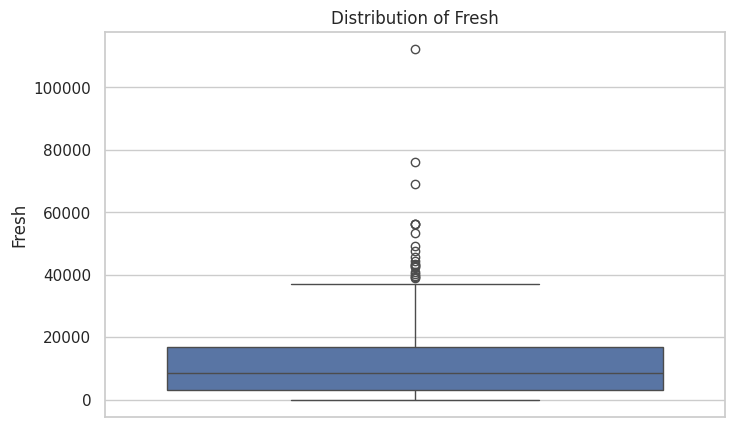

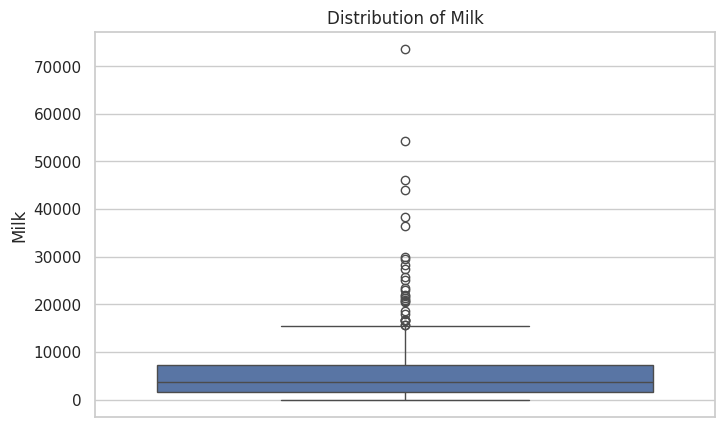

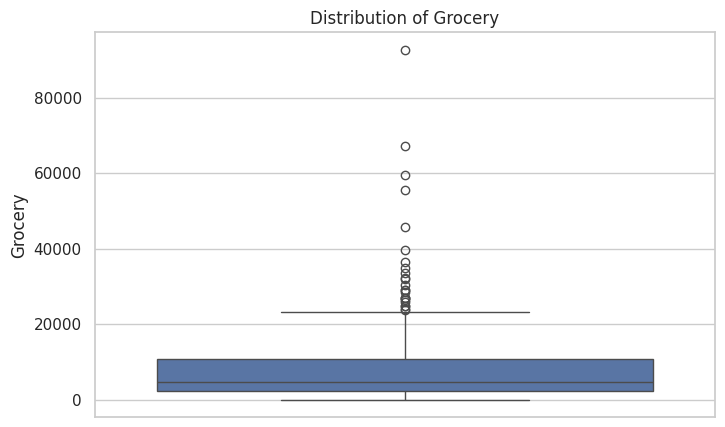

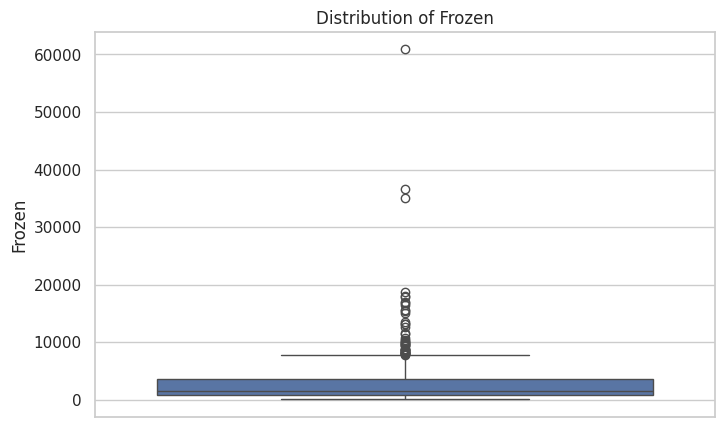

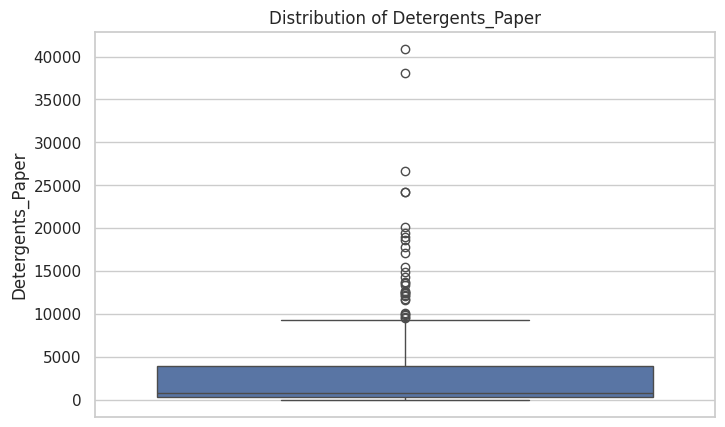

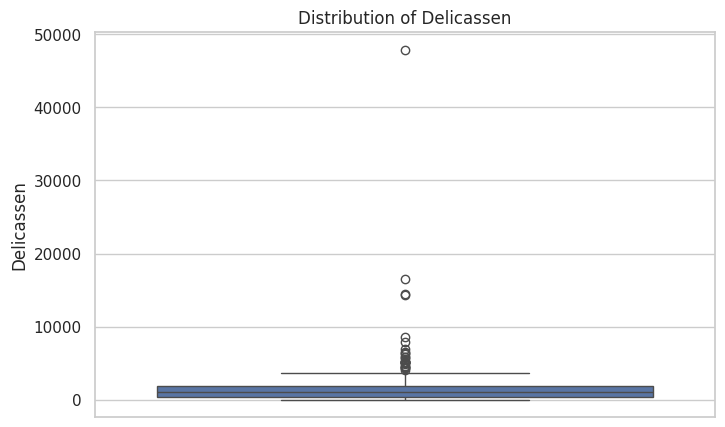

In [126]:
for i in num_feat:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df,y=i)
    plt.title(f"Distribution of {i}")
    plt.ylabel(i)
    plt.show()

The data clearly shows outliers, but based on domain knowledge, they appear natural. I don't believe we should remove them as they don't seem to be noise or errors.

The data is now ready for further analysis.

## **3- Exploratory Data Analysis (EDA):**



In EDA, we will:

*   Plot the distributions of numeric features.
*   Visualize the counts of categorical features.
*   Create a correlation matrix to  check relationships between features.
*   Generate pair plots to explore feature interactions.





### **3-1 Distribution of Numeric Features**


Plot the distributions of numeric features:

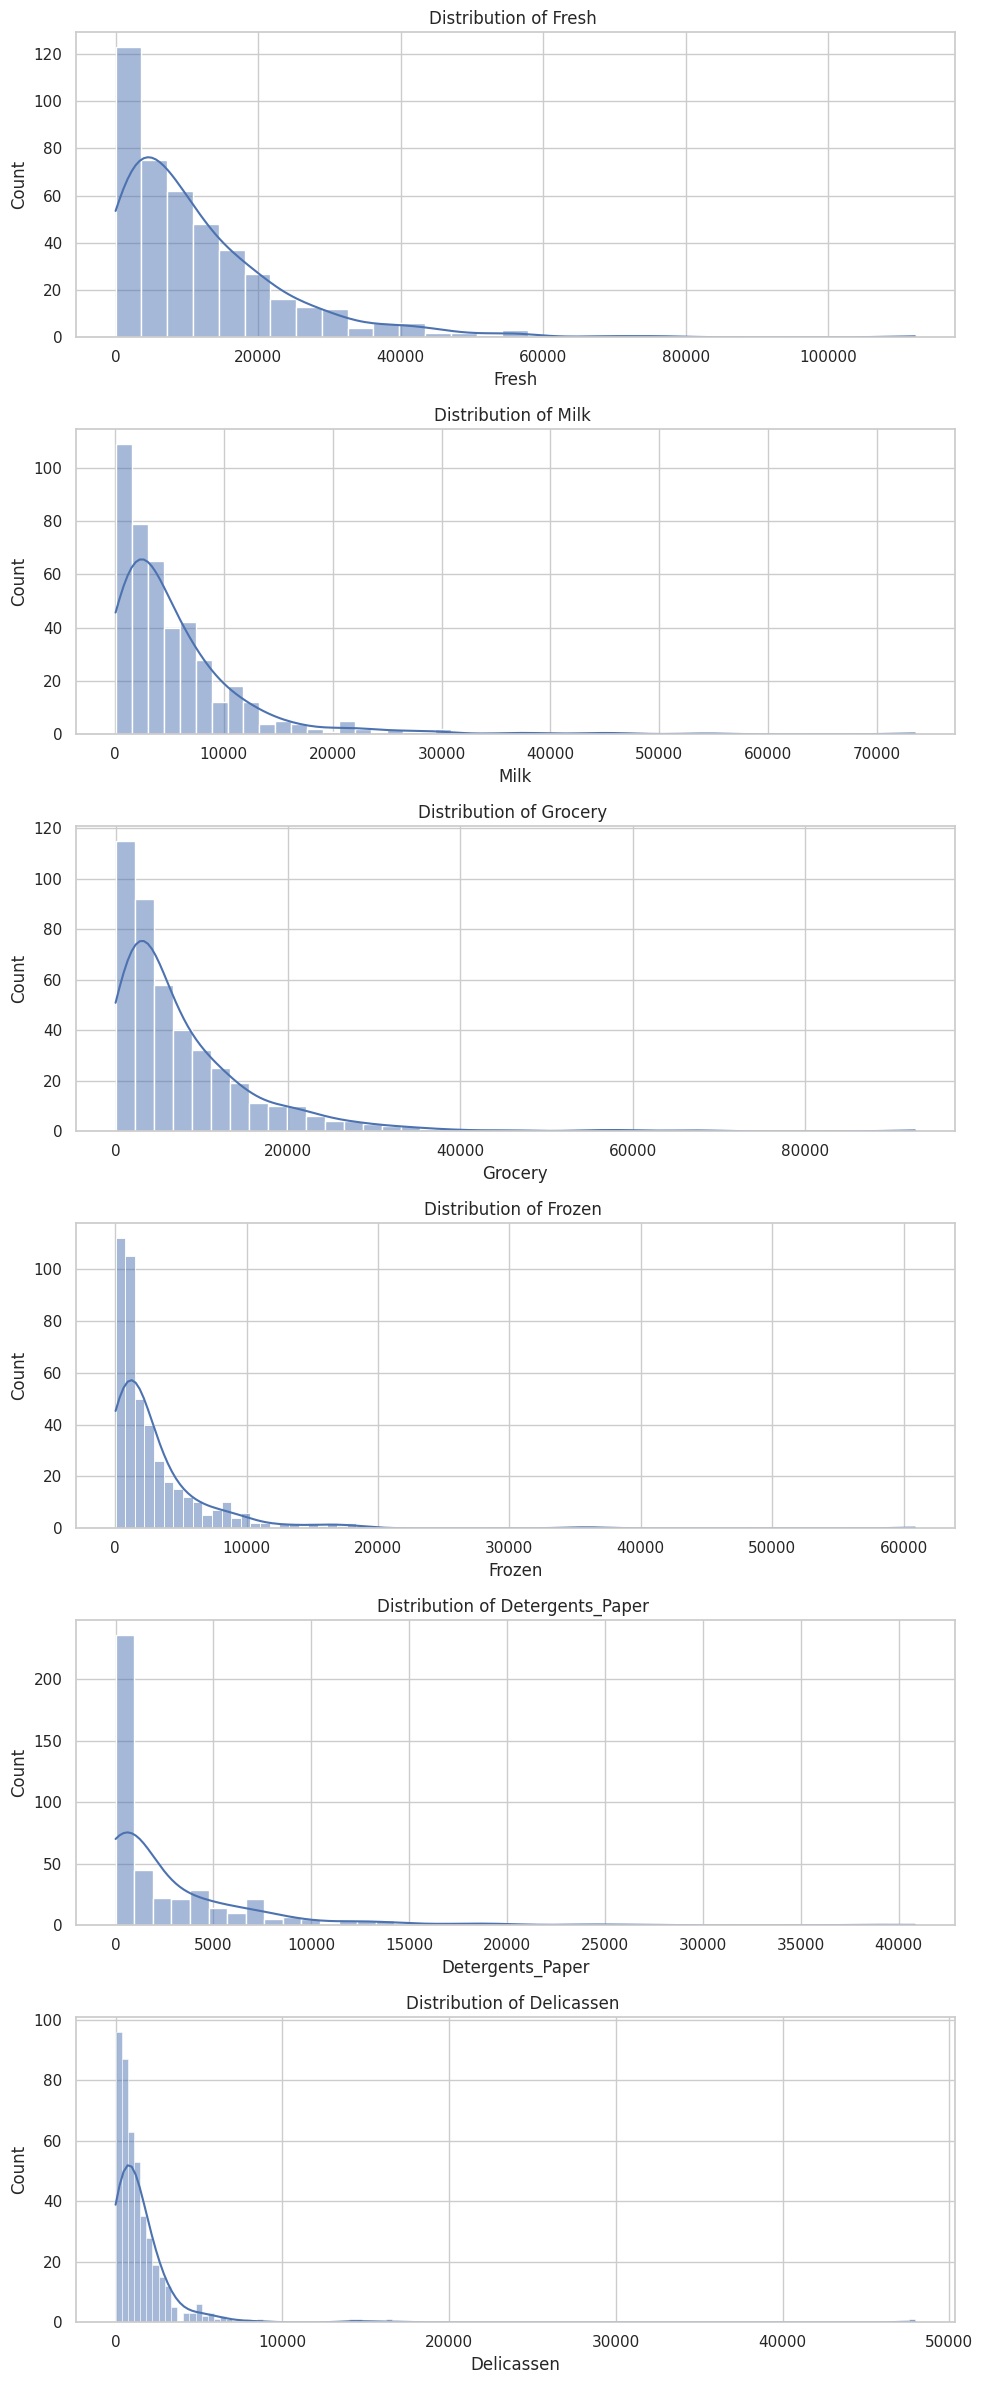

In [127]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(len(num_feat), 1, figsize=(10, len(num_feat) * 4))
for i, col in enumerate(num_feat):
    sns.histplot(df1, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col} ")

plt.tight_layout()
plt.show()


### **3-2 Count of Categorical Features**


Visualize the counts of categorical features:

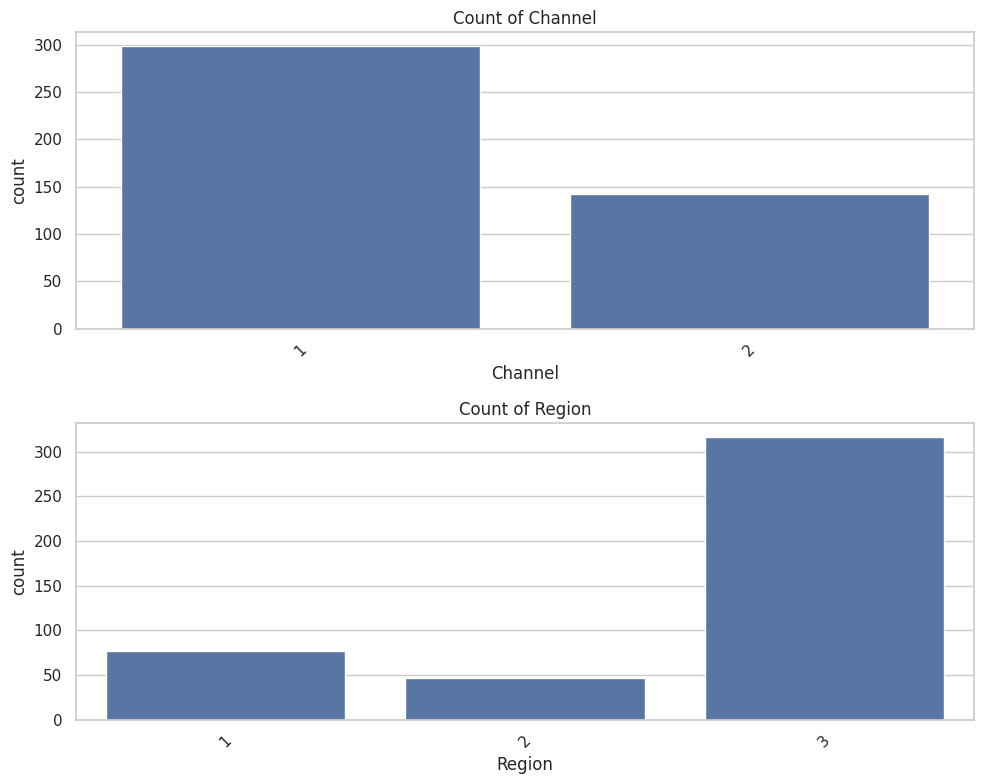

In [128]:
fig, axes = plt.subplots(len(cat_feat), 1, figsize=(10, len(cat_feat) * 4))
for i, col in enumerate(cat_feat):
    sns.countplot(data=df1, x=col, ax=axes[i])
    axes[i].set_title(f"Count of {col}")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

### **3-3 Correlation Matrix**


Create a correlation matrix to check relationships between features:

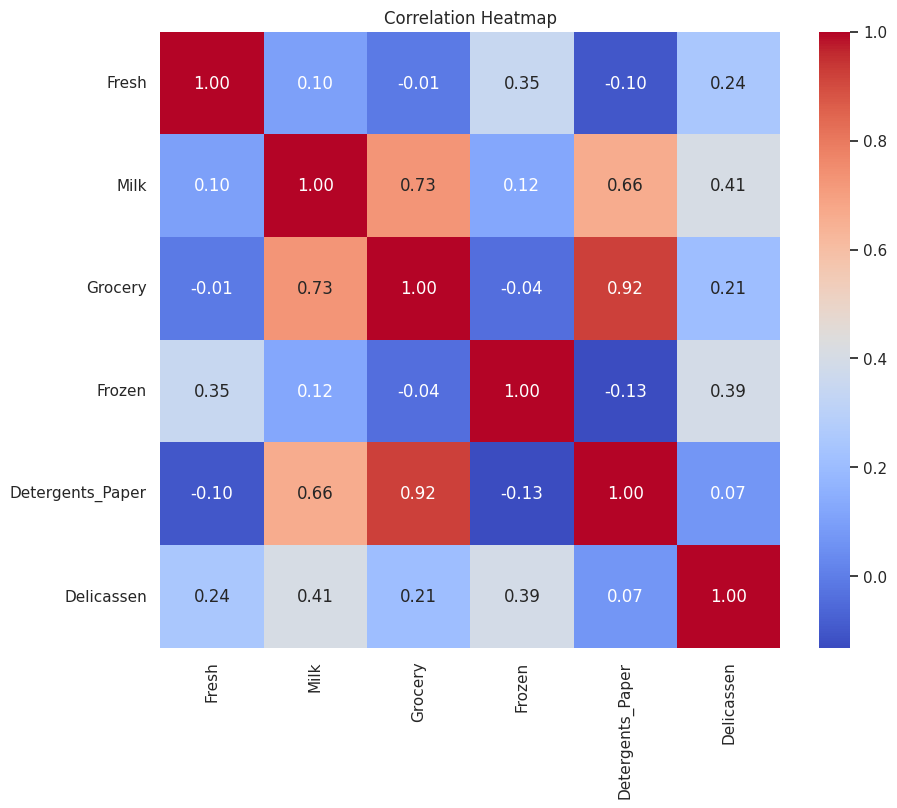

In [129]:
correlation_matrix = df1[num_feat].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

The correlation matrix shows:

1- Strong Positive Correlations:



*   Grocery and Detergents_Paper are highly correlated (0.92), indicating redundancy or strong relationship.  
*   Milk also has moderate to strong correlations with Grocery and Detergents_Paper.


2- Weak Correlations:

Fresh, Frozen, and Delicassen show weak correlations with most other features, showing they might capture independent information.

### **3-4 Pair Plot Analysis**


Generate pair plots to explore feature interactions:

[]

<Figure size 1500x1000 with 0 Axes>

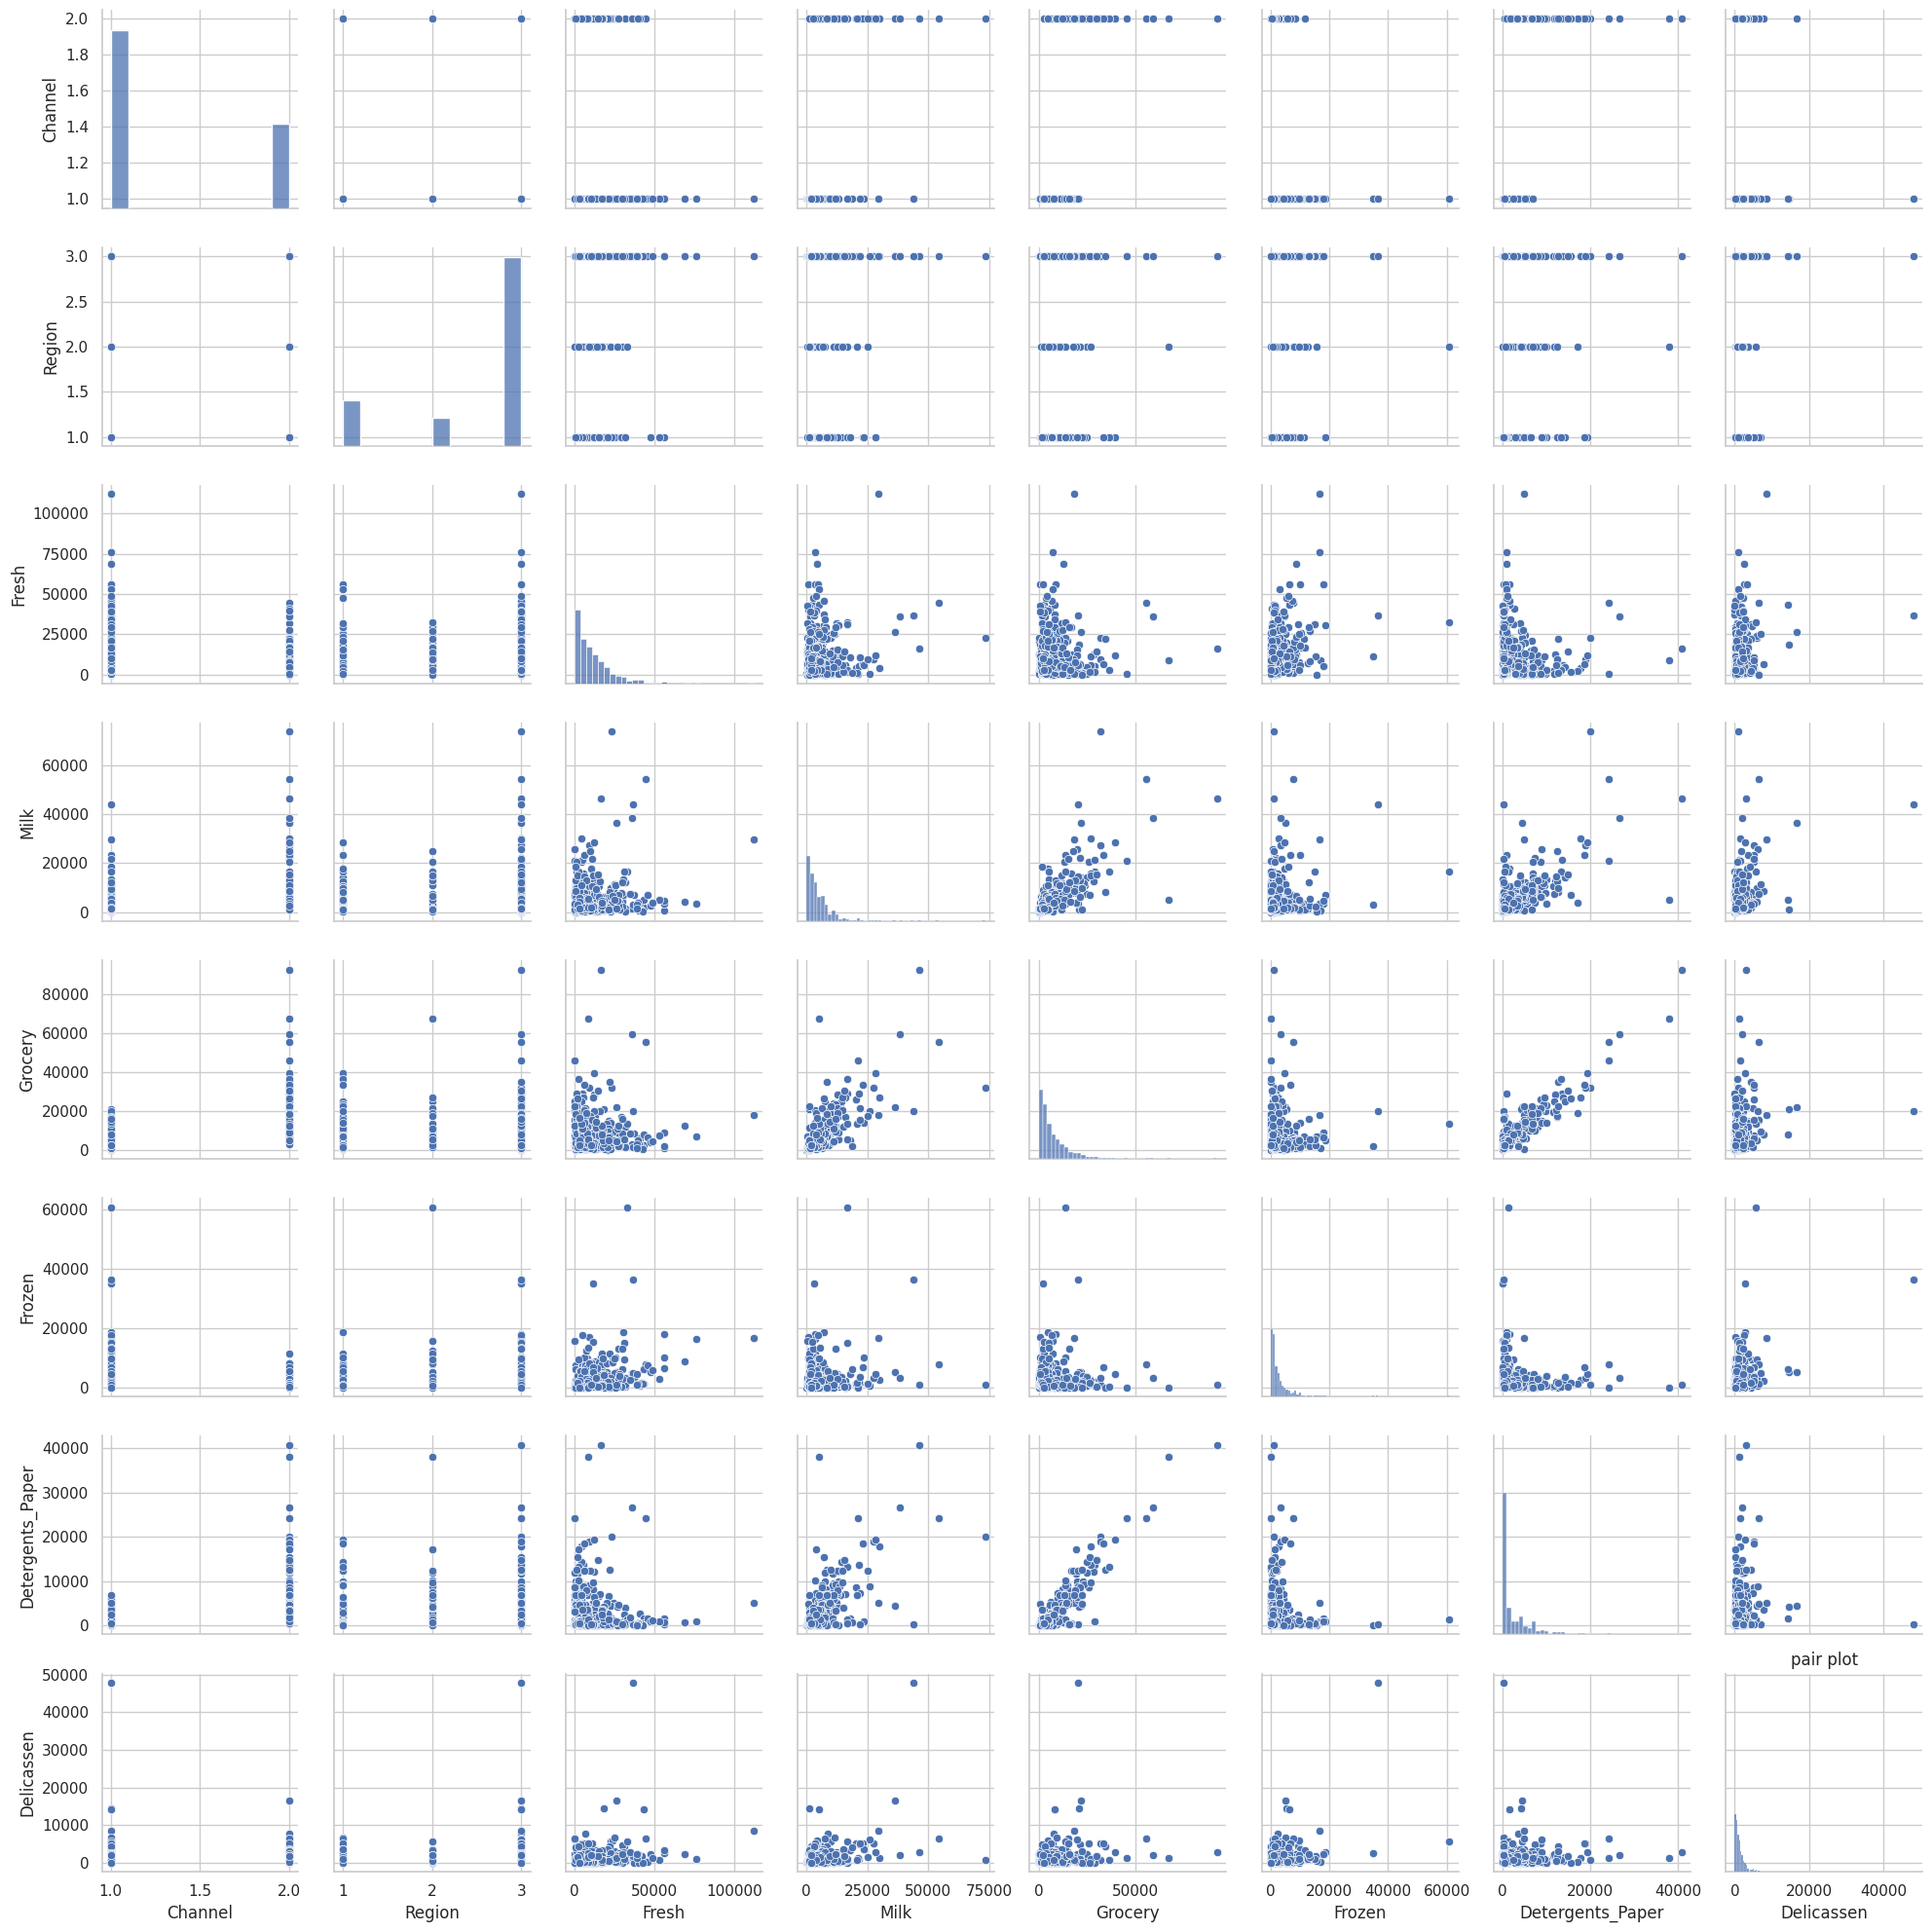

In [130]:
plt.figure(figsize=(15,10))
sns.pairplot(df1)
plt.title("pair plot")
plt.tight_layout()
plt.plot()

Based on the correlation matrix and pair plots, some features show high correlation. We will address this and find a solution in the next section.

## **4- Model building:**



### **4-1 Data Scaling**

Scaling is important for clustering algorithms like KMeans to ensure features contribute equally.

In [131]:
data_sn = df1.copy(deep = True)

In [132]:
numeric_data = data_sn.drop(columns=["Channel", "Region"])
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(numeric_data), columns=numeric_data.columns)

print(scaled_data.describe().T)



                  count  mean  std   min   25%   50%  75%   max
Fresh            440.00 -0.00 1.00 -0.95 -0.70 -0.28 0.39  7.93
Milk             440.00  0.00 1.00 -0.78 -0.58 -0.29 0.19  9.18
Grocery          440.00 -0.00 1.00 -0.84 -0.61 -0.34 0.28  8.94
Frozen           440.00  0.00 1.00 -0.63 -0.48 -0.32 0.10 11.92
Detergents_Paper 440.00  0.00 1.00 -0.60 -0.55 -0.43 0.22  7.97
Delicassen       440.00 -0.00 1.00 -0.54 -0.40 -0.20 0.10 16.48


The data is now scaled, with all features having a mean of 0 and standard deviation of 1.

### **4-2 Principal Component Analysis (PCA)**


From the correlation matrix:  
Grocery and Detergents_Paper show a strong correlation (r>0.8).  
Milk also has moderate correlations with Grocery and Detergents_Paper.  
We can either drop one of the correlated features or use dimensionality reduction techniques.  
I will use PCA here. PCA is a dimensionality reduction technique used to simplify datasets with many features while preserving as much variation as possible.



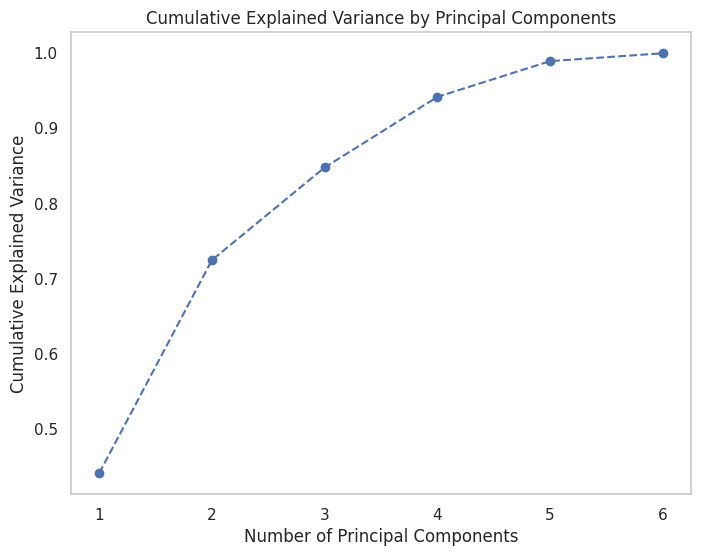

array([0.44082893, 0.283764  , 0.12334413, 0.09395504, 0.04761272,
       0.01049519])

In [133]:
pca = PCA(n_components=None)
pca_result = pca.fit_transform(scaled_data)

explained_variance = pca.explained_variance_ratio_

cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

explained_variance


From the plot above, we can see that the first two components explain about 72.5% of the variance (44.1% + 28.4%).  
Adding the third component increases cumulative variance to about 84.8%.  
It means with the first three components, we can capture most of the information in the dataset.  
Then I will reduce the data to three principal components.


In [134]:
pca_three = PCA(n_components=3)
reduced_data = pca_three.fit_transform(scaled_data)

reduced_data_df = pd.DataFrame(reduced_data, columns=["PC1", "PC2", "PC3"])

print(reduced_data_df.head())


    PC1   PC2   PC3
0  0.19 -0.31  0.14
1  0.43 -0.33 -0.32
2  0.81  0.82 -1.52
3 -0.78  0.65 -0.16
4  0.17  1.27 -0.07


### **4-3 K-Means (model 1)**

First, I will use the elbow method to determine the optimal value of k.

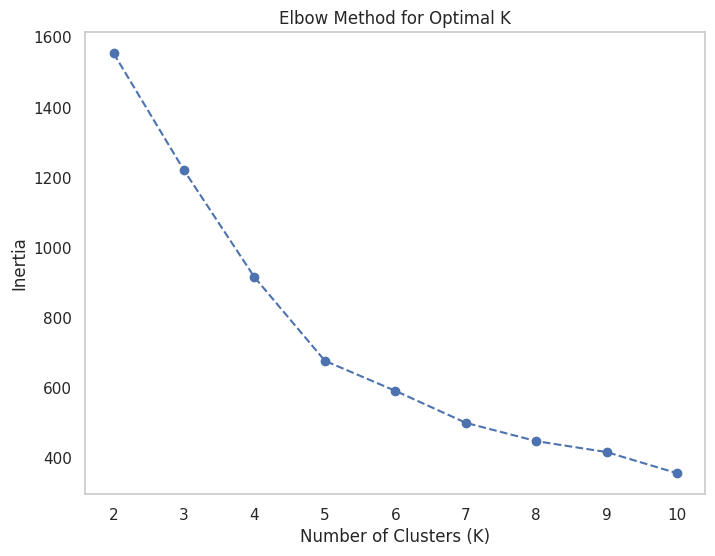

In [135]:
inertia = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid()
plt.show()




Based on the elbow method plot, I will choose k=5 as the number of clusters:

In [136]:
kmeans_5 = KMeans(n_clusters=5, random_state=42)
kmeans_5_labels = kmeans_5.fit_predict(reduced_data_df.iloc[:, :3])

reduced_data_df['Cluster_5'] = kmeans_5_labels

cluster_5_centers = kmeans_5.cluster_centers_

print(reduced_data_df.head(), '\n' , cluster_5_centers)


    PC1   PC2   PC3  Cluster_5
0  0.19 -0.31  0.14          1
1  0.43 -0.33 -0.32          0
2  0.81  0.82 -1.52          0
3 -0.78  0.65 -0.16          1
4  0.17  1.27 -0.07          4 
 [[ 1.37650756 -0.71947679 -0.21810694]
 [-0.74732319 -0.18584972 -0.14271362]
 [ 7.28674184 -1.05985283  0.84736335]
 [ 4.90614814 11.47728575 -5.07006518]
 [-0.25267196  1.70223699  0.96936701]]


Below, we can see the 5 K-means clusters visualized on the PCA plot.

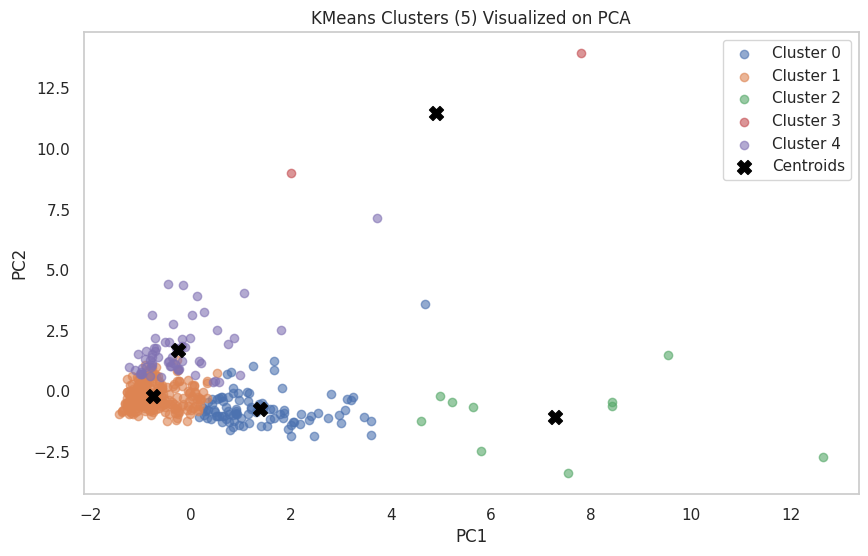

In [137]:
plt.figure(figsize=(10, 6))
for cluster in range(5):
    cluster_data = reduced_data_df[reduced_data_df['Cluster_5'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', alpha=0.6)

centers = kmeans_5.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=100, label='Centroids')

plt.title('KMeans Clusters (5) Visualized on PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid()
plt.show()



Previously, when checking for outliers, we noticed significant noisy data in our dataframe but decided not to modify them. However, after analyzing the clusters, it’s clear that this noisy data significantly impacts the clustering results. It’s better to remove the noise now. I will use the DBSCAN method for this. Note that DBSCAN was not covered in class.  
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering method. It groups data points that are close together (based on density) and marks points in low-density areas as noise.  
We used DBSCAN to remove noise because it can identify and separate outliers naturally. This helps improve the quality of our clusters.

In [138]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(reduced_data_df.iloc[:, :3])

reduced_data_df['DBSCAN_Label'] = dbscan_labels

denoised_data = reduced_data_df[reduced_data_df['DBSCAN_Label'] != -1].iloc[:, :3]
print(denoised_data.head())


    PC1   PC2   PC3
0  0.19 -0.31  0.14
1  0.43 -0.33 -0.32
3 -0.78  0.65 -0.16
5 -0.16 -0.30 -0.15
6 -0.34 -0.53  0.30


Now I will use the elbow method again to determine the new optimal value of k.

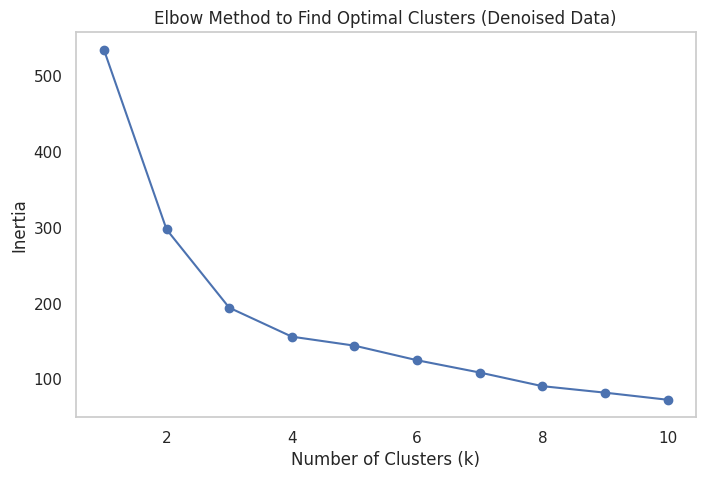

In [139]:

inertia = []
range_clusters = range(1, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(denoised_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method to Find Optimal Clusters (Denoised Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()


Based on the new elbow method plot, I will choose k=3 as the number of clusters:

In [140]:
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_3_labels = kmeans_3.fit_predict(denoised_data.iloc[:, :3])

denoised_data['Cluster_3'] = kmeans_3_labels

cluster_3_centers = kmeans_3.cluster_centers_

print(denoised_data.head(), "\n" , cluster_3_centers)

    PC1   PC2   PC3  Cluster_3
0  0.19 -0.31  0.14          1
1  0.43 -0.33 -0.32          1
3 -0.78  0.65 -0.16          2
5 -0.16 -0.30 -0.15          0
6 -0.34 -0.53  0.30          0 
 [[-0.85273666 -0.31847604 -0.26940469]
 [ 0.89437315 -0.83965334 -0.2090907 ]
 [-0.61990417  0.60987426  0.65211591]]


Below, we can see the 3 K-means clusters visualized on the PCA plot.

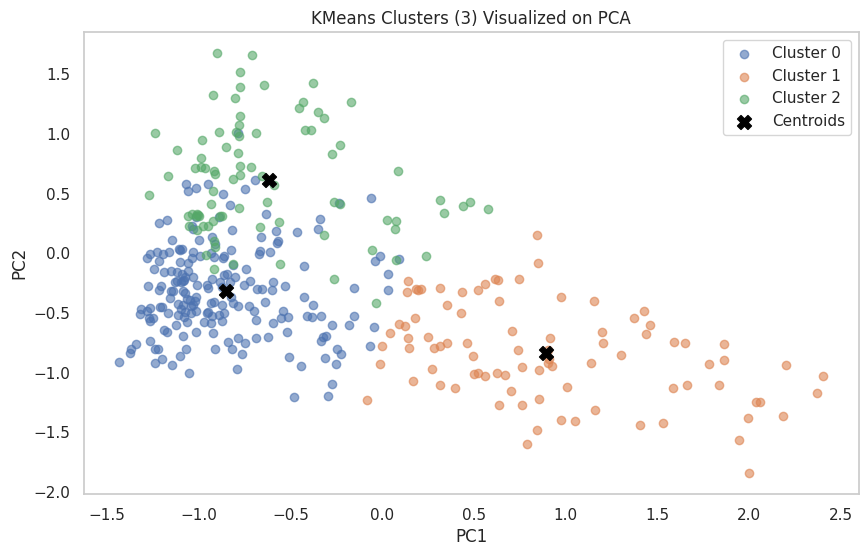

In [141]:
plt.figure(figsize=(10, 6))
for cluster in range(3):
    cluster_data = denoised_data[denoised_data['Cluster_3'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', alpha=0.6)

# Mark the cluster centers
centers = kmeans_3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=100, label='Centroids')

# Add plot details
plt.title('KMeans Clusters (3) Visualized on PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid()
plt.show()


It seems that our clustering improved significantly this time.

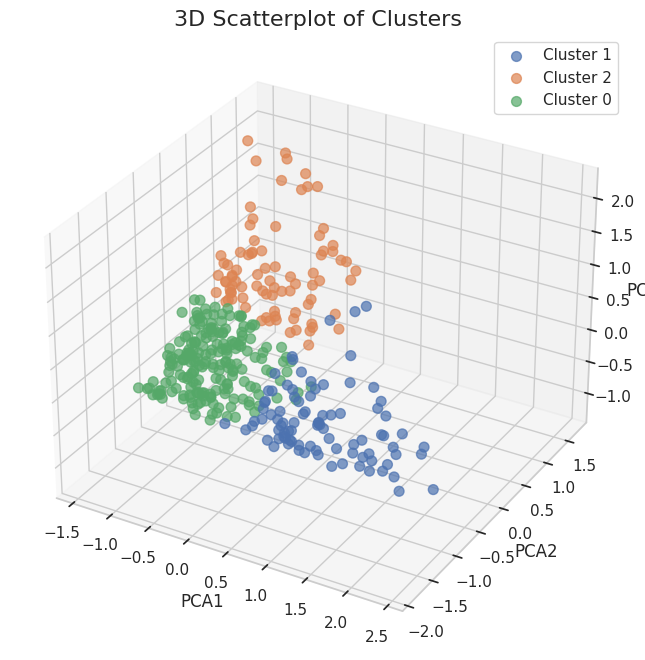

In [142]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in denoised_data['Cluster_3'].unique():
    cluster_data = denoised_data[denoised_data['Cluster_3'] == cluster]
    ax.scatter(
        cluster_data['PC1'],
        cluster_data['PC2'],
        cluster_data['PC3'],
        label=f'Cluster {cluster}',
        s=50, alpha=0.7
    )

# Labels and legend
ax.set_title('3D Scatterplot of Clusters', fontsize=16)
ax.set_xlabel('PCA1', fontsize=12)
ax.set_ylabel('PCA2', fontsize=12)
ax.set_zlabel('PCA3', fontsize=12)
ax.legend()

# Show the plot
plt.show()


In the 3D plot, we can clearly see that the clustering is done perfectly.

### **4-4 Hierarchical clustering (model 2)**

For hierarchical clustering, we should first draw a dendrogram plot and then choose an appropriate distance threshold based on it.

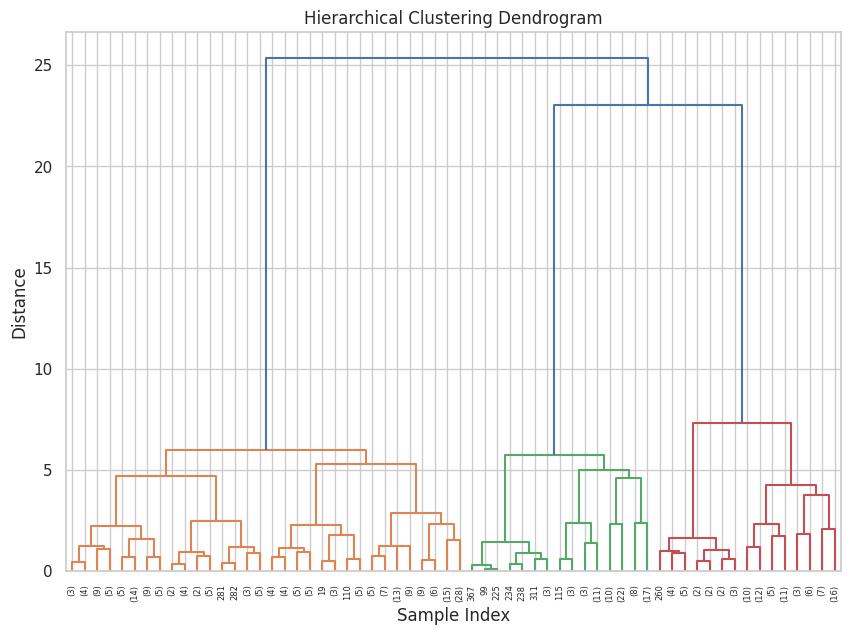

In [143]:
linkage_matrix = linkage(denoised_data, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='level', p=5)  # Adjust 'p' to control dendrogram depth
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


We should follow these two steps:

1- Identify large jumps in the height between clusters on the dendrogram. Cut the dendrogram at the largest gap to form fewer clusters with clear distinctions.  
2- Avoid cutting at very small heights, as this could result in too many small, similar clusters.  
Then, I will choose a distance threshold of 6.

In [144]:
distance_threshold = 6
clusters = fcluster(linkage_matrix, distance_threshold, criterion='distance')

denoised_data['Hierarchical_Cluster'] = clusters

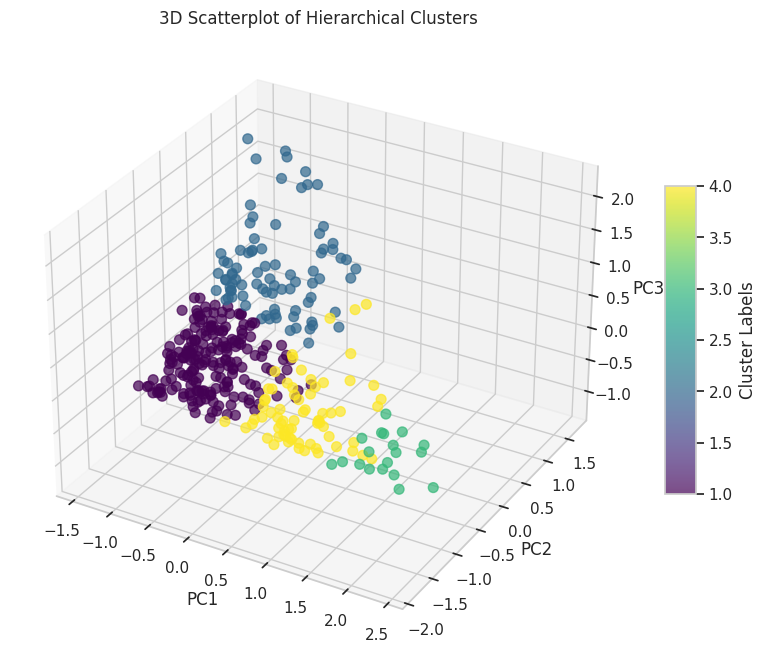

In [145]:
assert 'Hierarchical_Cluster' in denoised_data.columns, "Run hierarchical clustering first to create cluster labels."

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    denoised_data['PC1'],
    denoised_data['PC2'],
    denoised_data['PC3'],
    c=denoised_data['Hierarchical_Cluster'],
    cmap='viridis',
    s=50,
    alpha=0.7
)


ax.set_title("3D Scatterplot of Hierarchical Clusters")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
color_bar = plt.colorbar(sc, ax=ax, shrink=0.5, aspect=10)
color_bar.set_label("Cluster Labels")

plt.show()


In the 3D plot, we can see that same as K-means the clustering is done perfectly.

## **5- Discussion and Conclusion:**



### **5-1 Comparison Between Models**


In [146]:
print(denoised_data.head())

    PC1   PC2   PC3  Cluster_3  Hierarchical_Cluster
0  0.19 -0.31  0.14          1                     4
1  0.43 -0.33 -0.32          1                     4
3 -0.78  0.65 -0.16          2                     2
5 -0.16 -0.30 -0.15          0                     1
6 -0.34 -0.53  0.30          0                     1


Hierarchical clustering grouped the data into 4 clusters, while K-means grouped it into 3 clusters.  
1- KMeans: Performed clustering with k=3. This algorithm minimizes intra-cluster variance and assigns points to predefined clusters.  
2- Hierarchical Clustering: Created clusters using a dendrogram. The data was partitioned into four clusters.

### **5-2 Key Takeaways**




1- K-Means
*   Strengths:  
Scales well to large datasets.  
Simple and efficient for compact, spherical clusters.
*   Weaknesses:  
Requires k to be specified.  
Sensitive to outliers and initialization of centroids.    

2- Hierarchical Clustering
*   Strengths:  
Does not require the number of clusters to be specified upfront.  
Can visualize the clustering structure through a dendrogram.  
*   Weaknesses:  
Computationally expensive for large datasets.  
Less scalable compared to K-Means.  
Choice of distance threshold can affect results.  

### **5-3 Conclusions**




K-Means performed well on this dataset after noise removal, clustering data into three compact groups. However, it is less effective for datasets with noise.  
Hierarchical clustering provided a detailed view of the clustering structure, making it suitable for exploratory analysis, though it is computationally expensive.  

**Recommendation:**  
 For large datasets requiring efficiency, K-Means is preferred. For smaller datasets or exploratory purposes, hierarchical clustering offers more flexibility and interpretability.